# StackOverflow Survey Data Analysis

## A Look at the Data

In order to get a better understanding of the data, some of the characteristics of the dataset will be explored as follows.

1. Number of rows and columns in this dataset.
2. Provide a set of column names that have no missing values.
3. Which columns have the most missing values? Provide a set of column names that have more than 75% of their values missing.
4. Provide a pandas series of the different **Professional** status values in the dataset along with the count of the number of individuals with each status.
5. Provide a pandas series of the different FormalEducation status values in the dataset along with the count of how many individuals received that formal education.
6. Provide a pandas series of the different Country values in the dataset along with the count of how many individuals are from each country. 

In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


os.chdir("projects_on_GitHub/cases/SurveyDataAnalysis")

In [2]:
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 1. Number of rows and columns in the dataset
print("There are {} rows and {} columns in the dataset.".format(df.shape[0], df.shape[1]))

There are 19102 rows and 154 columns in the dataset.


In [9]:
# 2. Provide a set of column names that have no missing values.
no_nulls = set(df.columns[df.isnull().sum()==0])
no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

In [12]:
# Find columns with the most null values
na_max = df.isna().sum().max()
df.columns[df.isna().sum()==na_max]

Index(['ExCoderNotForMe', 'ExCoderWillNotCode'], dtype='object')

In [14]:
# For check purpose
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Data columns (total 154 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    Respondent                        19102 non-null  int64  
 1    Professional                      19102 non-null  object 
 2    ProgramHobby                      19102 non-null  object 
 3    Country                           19102 non-null  object 
 4    University                        19102 non-null  object 
 5    EmploymentStatus                  19102 non-null  object 
 6    FormalEducation                   19102 non-null  object 
 7    MajorUndergrad                    15899 non-null  object 
 8    HomeRemote                        16471 non-null  object 
 9    CompanySize                       14653 non-null  object 
 10   CompanyType                       14609 non-null  object 
 11   YearsProgram                      19005 non-null  ob

In [16]:
# 3. Provide a set of column names that have more than 75% of their values missing.
nulls_75plus = set(df.columns[df.isna().mean() >= .75])
nulls_75plus

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

In [28]:
# 4. Professional status value counts
## Check null values in `Professional` feature
df.Professional.isna().sum()

0

In [25]:
status_vals = df.Professional.value_counts(dropna=False, normalize=True, ascending=True)
status_vals

Used to be a professional developer                     0.018689
None of these                                           0.019265
Professional non-developer who sometimes writes code    0.093289
Student                                                 0.147681
Professional developer                                  0.721076
Name: Professional, dtype: float64

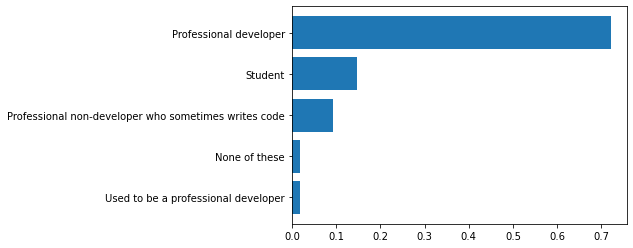

In [26]:
# Visualization for Q4
plt.barh(y=status_vals.index.values, width=status_vals.values);

In [29]:
# 5. `FormalEducation` value counts
## Check null values in `FormalEducation` feature
df.FormalEducation.isna().sum()

0

In [49]:
def viz_freq(feature_name, top_k=None, norm=None, asc=False):
    if top_k is None:
        val_counts = df[feature_name].value_counts(normalize=norm, ascending=asc)
        print(val_counts)
        plt.barh(y=val_counts.index.values, width=val_counts.values);
        
    else:
        val_counts = df[feature_name].value_counts(normalize=norm, ascending=asc)
        top_k_vals = val_counts[-top_k:]
        print(top_k_vals)
        plt.barh(y=top_k_vals.index.values, width=top_k_vals.values);

I never completed any formal education                               0.007591
Professional degree                                                  0.013349
Primary/elementary school                                            0.021150
I prefer not to answer                                               0.021411
Doctoral degree                                                      0.028845
Secondary school                                                     0.116585
Some college/university study without earning a bachelor's degree    0.150194
Master's degree                                                      0.216888
Bachelor's degree                                                    0.423987
Name: FormalEducation, dtype: float64


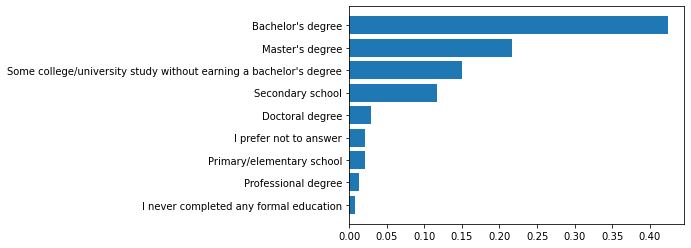

In [50]:
viz_freq("FormalEducation", norm=True, asc=True)

In [52]:
# 6. `Country` value counts
## Check null values in `FormalEducation` feature
df.Country.isna().sum()

0

Ivory Coast (Cote D'Ivoire)    0.000052
Qatar                          0.000052
Libya                          0.000052
Sudan                          0.000052
Vatican City State             0.000052
                                 ...   
Canada                         0.045754
Germany                        0.069993
United Kingdom                 0.074547
India                          0.081510
United States                  0.228458
Name: Country, Length: 165, dtype: float64


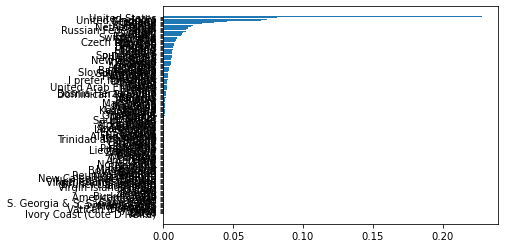

In [53]:
viz_freq("Country", norm=True, asc=True)

Israel            0.017694
Netherlands       0.019527
Australia         0.020888
France            0.027327
Poland            0.036331
Canada            0.045754
Germany           0.069993
United Kingdom    0.074547
India             0.081510
United States     0.228458
Name: Country, dtype: float64


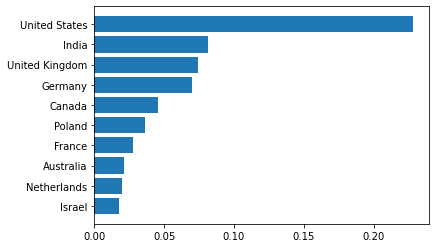

In [82]:
viz_freq("Country", top_k=10, norm=True, asc=True)

___I make the function above in a python script under root folder.___

In [3]:
import data_overview as d

Used to be a professional developer                     0.018689
None of these                                           0.019265
Professional non-developer who sometimes writes code    0.093289
Student                                                 0.147681
Professional developer                                  0.721076
Name: Professional, dtype: float64


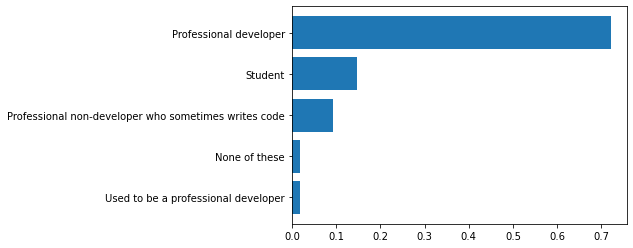

In [8]:
d.viz_freq(df, "Professional", norm=True, asc=True)

I never completed any formal education                               0.007591
Professional degree                                                  0.013349
Primary/elementary school                                            0.021150
I prefer not to answer                                               0.021411
Doctoral degree                                                      0.028845
Secondary school                                                     0.116585
Some college/university study without earning a bachelor's degree    0.150194
Master's degree                                                      0.216888
Bachelor's degree                                                    0.423987
Name: FormalEducation, dtype: float64


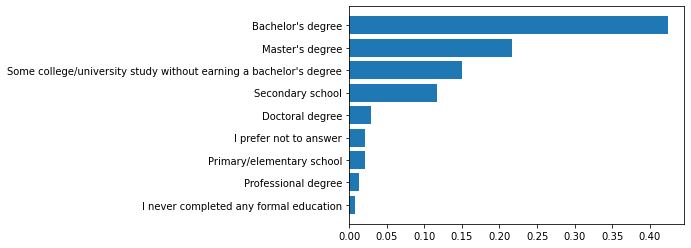

In [9]:
d.viz_freq(df, "FormalEducation", norm=True, asc=True)

Israel            0.017694
Netherlands       0.019527
Australia         0.020888
France            0.027327
Poland            0.036331
Canada            0.045754
Germany           0.069993
United Kingdom    0.074547
India             0.081510
United States     0.228458
Name: Country, dtype: float64


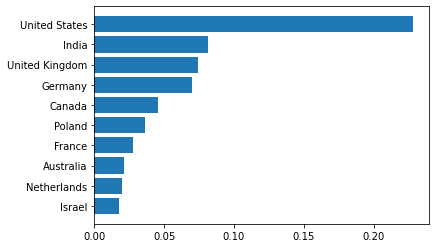

In [4]:
# Country
d.viz_freq(df, "Country", top_k=10, norm=True, asc=True)